In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import shapiro
import math
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [87]:
df1=pd.read_csv('Wholesale+Customers+Data.csv')

In [88]:
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [89]:
df1.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [90]:
df1.shape
print('No.of rows is {}, and No. of columns is {}'.format(df1.shape[0],df1.shape[1]))

No.of rows is 440, and No. of columns is 9


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [92]:
df1.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [93]:
df1.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [94]:
df1.drop('Buyer/Spender',axis=1,inplace=True)
df1.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen'],
      dtype='object')

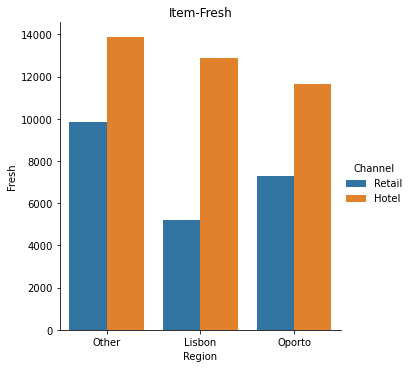

In [95]:
sns.catplot(data=df1,x='Region',y='Fresh',hue='Channel',kind='bar',ci=False)
plt.title('Item-Fresh')
plt.show()

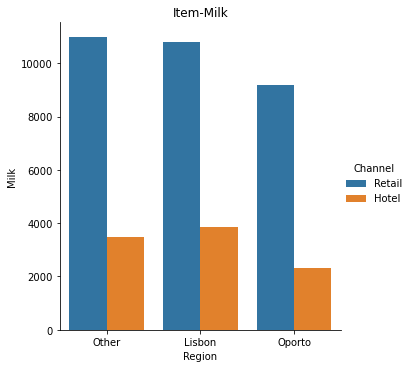

In [96]:
sns.catplot(data=df1,x='Region',y='Milk',hue='Channel',kind='bar',ci=False)
plt.title('Item-Milk')
plt.show()

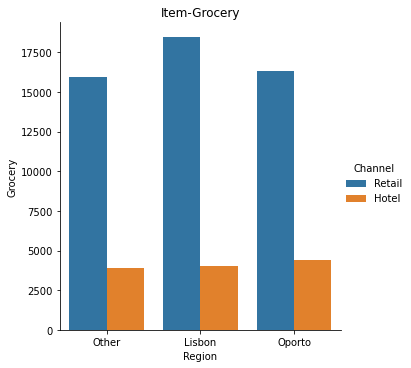

In [97]:
sns.catplot(data=df1,x='Region',y='Grocery',hue='Channel',kind='bar',ci=False)
plt.title('Item-Grocery')
plt.show()

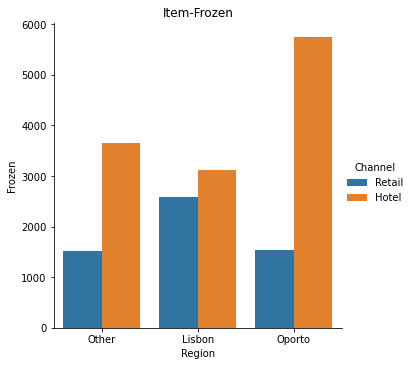

In [98]:
sns.catplot(data=df1,x='Region',y='Frozen',hue='Channel',kind='bar',ci=False)
plt.title('Item-Frozen')
plt.show()

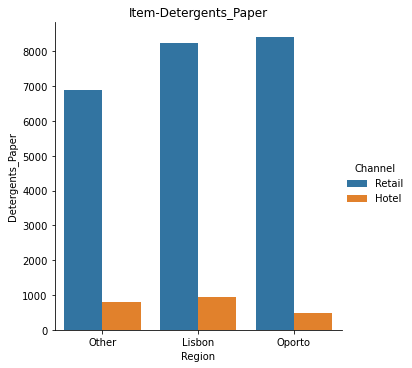

In [99]:
sns.catplot(data=df1,x='Region',y='Detergents_Paper',hue='Channel',kind='bar',ci=False)
plt.title('Item-Detergents_Paper')
plt.show()

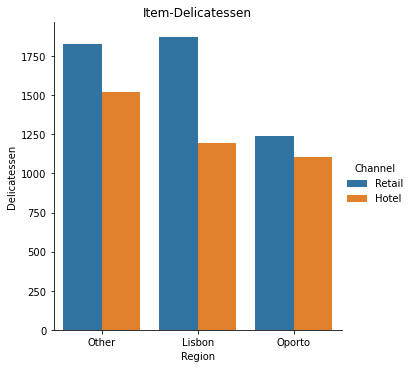

In [100]:
sns.catplot(data=df1,x='Region',y='Delicatessen',hue='Channel',kind='bar',ci=False)
plt.title('Item-Delicatessen')
plt.show()

In [101]:
df1_1=df1.groupby('Region').sum()
df1_1.sum(axis=1)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
dtype: int64

In [102]:
df1_2=df1.groupby('Channel').sum()
df1_2.sum(axis=1)

Channel
Hotel     7999569
Retail    6619931
dtype: int64

In [103]:
mean=df1.mean(numeric_only=True)
mean

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [104]:
stdev=df1.std(numeric_only=True)
stdev

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [105]:
COV=stdev/mean
COV

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

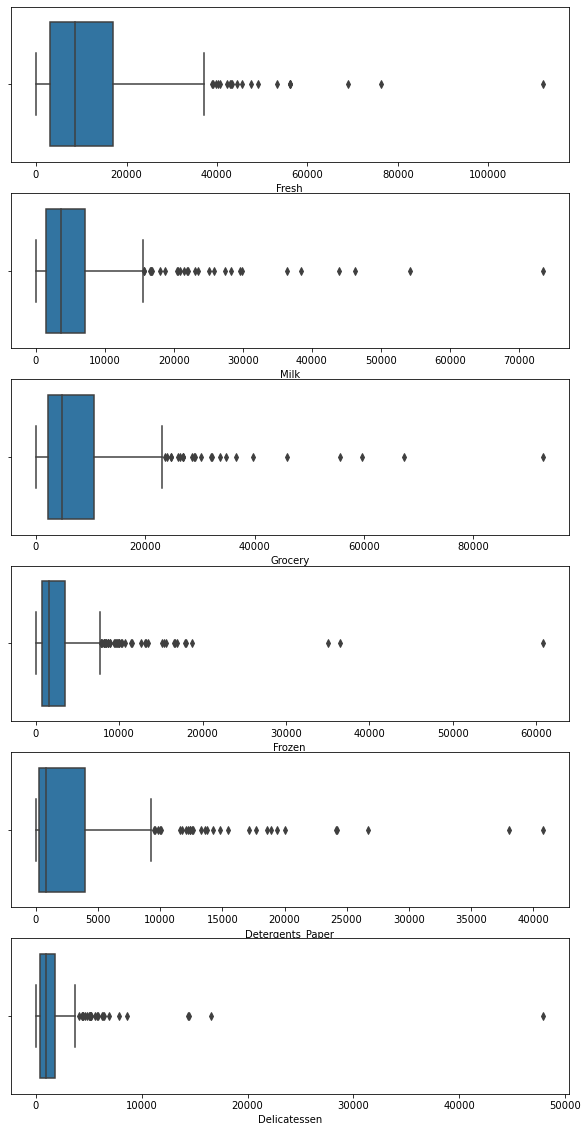

In [107]:
plt.figure(figsize=(10,20))
plt.subplot(6,1,1)
sns.boxplot(data=df1,x='Fresh')
plt.subplot(6,1,2)
sns.boxplot(data=df1,x='Milk')
plt.subplot(6,1,3)
sns.boxplot(data=df1,x='Grocery')
plt.subplot(6,1,4)
sns.boxplot(data=df1,x='Frozen')
plt.subplot(6,1,5)
sns.boxplot(data=df1,x='Detergents_Paper')
plt.subplot(6,1,6)
sns.boxplot(data=df1,x='Delicatessen')
plt.show()

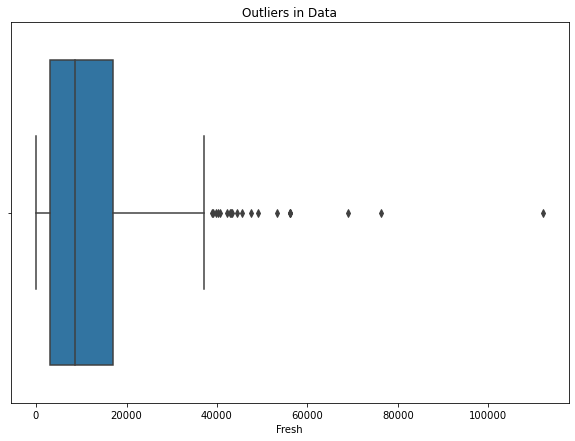

In [108]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df1,x='Fresh')
plt.title('Outliers in Data')
plt.show()

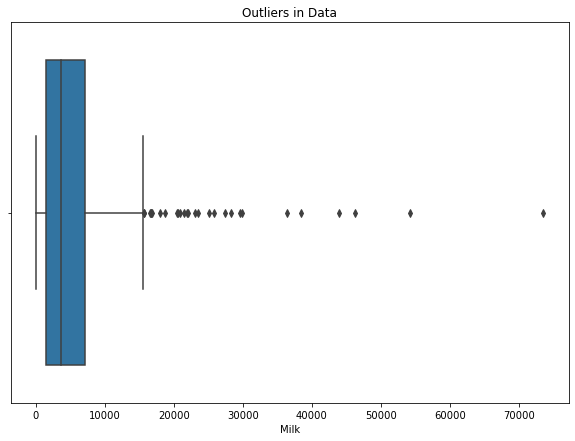

In [109]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df1,x='Milk')
plt.title('Outliers in Data')
plt.show()

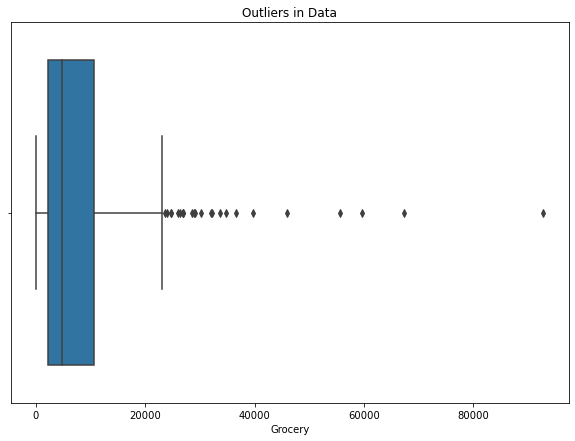

In [110]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df1,x='Grocery')
plt.title('Outliers in Data')
plt.show()

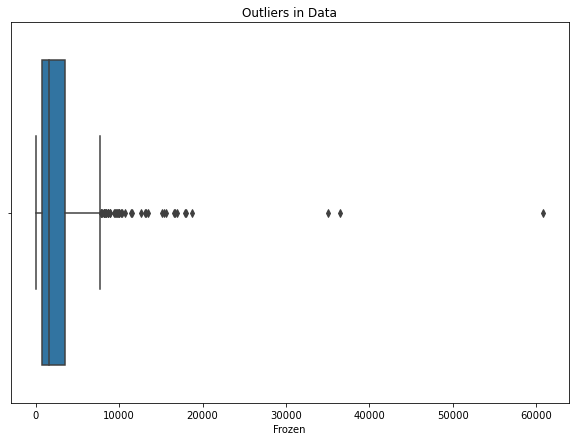

In [111]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df1,x='Frozen')
plt.title('Outliers in Data')
plt.show()

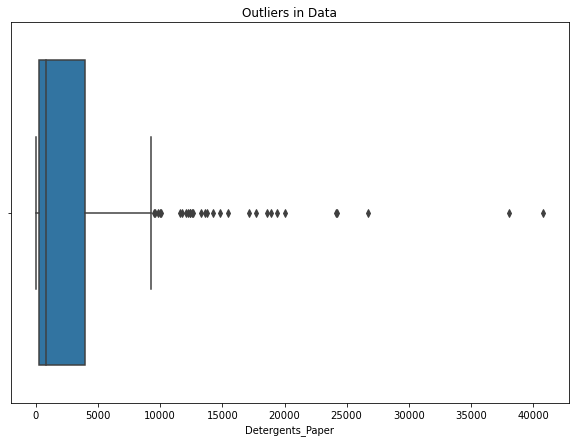

In [112]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df1,x='Detergents_Paper')
plt.title('Outliers in Data')
plt.show()

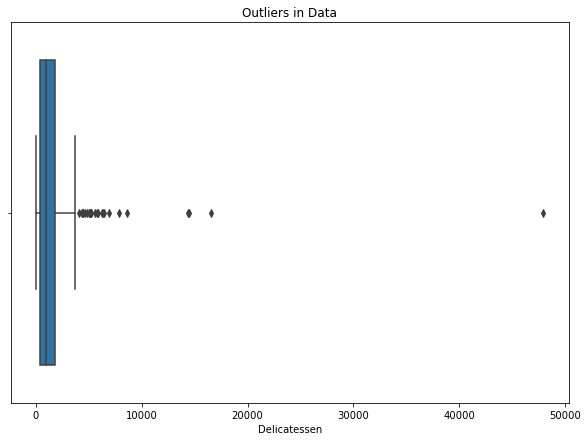

In [113]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df1,x='Delicatessen')
plt.title('Outliers in Data')
plt.show()

In [114]:
df2=pd.read_csv('Survey-1.csv')

In [115]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [116]:
df2.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [117]:
df2.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [120]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


In [121]:
table_1=pd.crosstab(df2['Gender'],df2['Major'])
table_1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [122]:
table_2=pd.crosstab(df2['Gender'],df2['Grad Intention'])
table_2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [123]:
table_3=pd.crosstab(df2['Gender'],df2['Employment'])
table_3

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [124]:
table_4=pd.crosstab(df2['Gender'],df2['Computer'])
table_4

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [125]:
df2['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [126]:
len(df2['Gender'])

62

In [127]:
random_is_male=(29/62)*100
print('Probability that a randomly selected CMSU student will be male is {:0.2f}%'.format(random_is_male))

Probability that a randomly selected CMSU student will be male is 46.77%


In [128]:
random_is_female=(33/62)*100
print('Probability that a randomly selected CMSU student will be female is {:0.2f}%'.format(random_is_female))

Probability that a randomly selected CMSU student will be female is 53.23%


In [129]:
pd.crosstab(df2['Gender'], df2['Major'],normalize='index')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448


In [130]:
male_acc=4/29*100
print('Probability that a male student will go for Accounting is {:0.2f}%'.format(male_acc))

Probability that a male student will go for Accounting is 13.79%


In [131]:
male_cis=1/29*100
print('Probability that a male student will go for CIS is {:0.2f}%'.format(male_cis))

Probability that a male student will go for CIS is 3.45%


In [132]:
male_econ=4/29*100
print('Probability that a male student will go for Economics/Finance is {:0.2f}%'.format(male_econ))

Probability that a male student will go for Economics/Finance is 13.79%


In [133]:
male_ib=2/29*100
print('Probability that a male student will go for International Business is {:0.2f}%'.format(male_ib))

Probability that a male student will go for International Business is 6.90%


In [134]:
male_mang=6/29*100
print('Probability that a male student will go for Management is {:0.2f}%'.format(male_mang))

Probability that a male student will go for Management is 20.69%


In [135]:
male_oth=4/29*100
print('Probability that a male student will go for Other courses is {:0.2f}%'.format(male_oth))

Probability that a male student will go for Other courses is 13.79%


In [136]:
male_ret=5/29*100
print('Probability that a male student will go for Retail/Marketing is {:0.2f}%'.format(male_ret))

Probability that a male student will go for Retail/Marketing is 17.24%


In [137]:
male_und=3/29*100
print('Probability that a male student is Undecided is {:0.2f}%'.format(male_und))

Probability that a male student is Undecided is 10.34%


In [138]:
female_acc=3/33*100
print('Probability that a female student will go for Accounting is {:0.2f}%'.format(female_acc))

Probability that a female student will go for Accounting is 9.09%


In [139]:
female_cis=3/33*100
print('Probability that a female student will go for CIS is {:0.2f}%'.format(female_cis))

Probability that a female student will go for CIS is 9.09%


In [140]:
female_econ=7/33*100
print('Probability that a female student will go for Economics/Finance is {:0.2f}%'.format(female_econ))

Probability that a female student will go for Economics/Finance is 21.21%


In [141]:
female_ib=4/33*100
print('Probability that a female student will go for International Business is {:0.2f}%'.format(female_ib))

Probability that a female student will go for International Business is 12.12%


In [142]:
female_mang=4/33*100
print('Probability that a female student will go for Management is {:0.2f}%'.format(female_mang))

Probability that a female student will go for Management is 12.12%


In [143]:
female_oth=3/33*100
print('Probability that a female student will go for Other courses is {:0.2f}%'.format(female_oth))

Probability that a female student will go for Other courses is 9.09%


In [144]:
female_ret=9/33*100
print('Probability that a female student will go for Retail/Marketing is {:0.2f}%'.format(female_ret))

Probability that a female student will go for Retail/Marketing is 27.27%


In [145]:
female_und=0/33*100
print('Probability that a female student is Undecided is {:0.2f}%'.format(female_und))

Probability that a female student is Undecided is 0.00%


In [150]:
table_2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [148]:
male_grad=17/29*100
print('Probability that a randomly chosen student is male and intends to graduate is {:0.2f}%'.format(male_grad))

Probability that a randomly chosen student is male and intends to graduate is 58.62%


In [152]:
table_4

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [149]:
female_no_laptop=4/33*100
print('Probability that a randomly selected student is a female and does NOT have a laptop is {:0.2f}%'.format(female_no_laptop))

Probability that a randomly selected student is a female and does NOT have a laptop is 12.12%


In [153]:
table_3

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [154]:
male_or_job=(29+3)/62*100
print('Probability that a randomly chosen student is a male or has a full-time employment is {:0.2f}%'.format(male_or_job))

Probability that a randomly chosen student is a male or has a full-time employment is 51.61%


In [155]:
table_1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [160]:
female_in_ib_mang=(4+4)/33*100
print('Probability that probability that given a female student is randomly chosen, she is majoring in international business or management is {:0.2f}%'.format(female_in_ib_mang))

Probability that probability that given a female student is randomly chosen, she is majoring in international business or management is 24.24%


In [161]:
table_2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [162]:
table_2_6=table_2.drop('Undecided',axis=1)
table_2_6

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [163]:
table_2_6.sum()

Grad Intention
No     12
Yes    28
dtype: int64

In [164]:
table_2_6.sum(axis=1)

Gender
Female    20
Male      20
dtype: int64

In [251]:
female=20/40
print('The probabaility that a student intends to graduate is female is {}%'.format(female))

The probabaility that a student intends to graduate is female is 0.5%


In [165]:
grad_intent=28/40*100
print('The probabaility that a student intends to graduate is {}%'.format(grad_intent))

The probabaility that a student intends to graduate is 70.0%


In [173]:
female_grad=11/20*100
print('The probabaility that given a student is female, she intends to graduate is {}%'.format(round(female_grad),1))

The probabaility that a female student intends to graduate is 55%


In [184]:
table_5=df2['GPA']
table_5

0     2.9
1     3.6
2     2.5
3     2.5
4     2.8
     ... 
57    2.4
58    2.9
59    2.5
60    3.5
61    3.2
Name: GPA, Length: 62, dtype: float64

In [186]:
(df2['GPA']<3).sum()

17

In [188]:
total_students=62
students_under_3_gpa=17
print('Probability that a randomly chosen student has GPA less than 3 is {:0.2f}%'.format(17/62*100))

Probability that a randomly chosen student has GPA less than 3 is 27.42%


In [210]:
table_6=pd.crosstab(df2['Gender'],df2['Salary'])
table_6

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [211]:
((df2['Gender']=='Male')&(df2['Salary'] >= 50.0)).sum()

14

In [212]:
((df2['Gender']=='Female')&(df2['Salary'] >= 50.0)).sum()

18

In [250]:
print('Probability that a randomly selected male earns 50 or more is {:0.2f}%'.format(14/29*100))
print('Probability that a randomly selected female earns 50 or more is {:0.2f}%'.format(18/33*100))

Probability that a randomly selected male earns 50 or more is 48.28%
Probability that a randomly selected female earns 50 or more is 54.55%


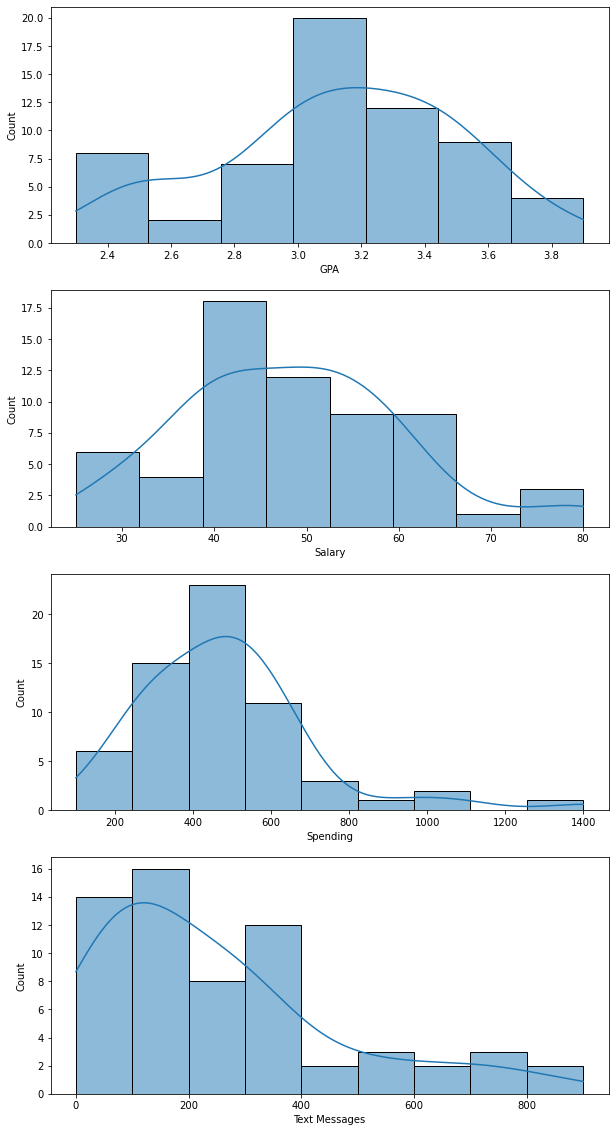

In [214]:
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
sns.histplot(data=df2,x='GPA',kde=True)
plt.subplot(4,1,2)
sns.histplot(data=df2,x='Salary',kde=True)
plt.subplot(4,1,3)
sns.histplot(data=df2,x='Spending',kde=True)
plt.subplot(4,1,4)
sns.histplot(data=df2,x='Text Messages',kde=True)
plt.show()

In [235]:
df2['GPA'].mean()

3.129032258064516

In [230]:
t_stat1,p_value1=stats.ttest_1samp(df2['GPA'],3.129)
print('for GPA,t_statistic={},p_value={}'.format(t_stat1,p_value1))

for GPA,t_statistic=0.0006730473403919533,p_value=0.9994651822348514


In [234]:
shapiro(df2['GPA'])

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

In [231]:
df2['Salary'].mean()

48.54838709677419

In [232]:
t_stat2,p_value2=stats.ttest_1samp(df2['Salary'],48.548)
print('for Salary,t_statistic={},p_value={}'.format(t_stat2,p_value2))

for Salary,t_statistic=0.00025229908084735034,p_value=0.9997995177584558


In [236]:
shapiro(df2['Salary'])

ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)

In [224]:
df2['Spending'].mean()

482.01612903225805

In [228]:
t_stat3,p_value3=stats.ttest_1samp(df2['Spending'],482.016)
print('for Spending,t_statistic={},p_value={}'.format(t_stat3,p_value3))

for Spending,t_statistic=4.577533671422567e-06,p_value=0.9999963625938787


In [237]:
shapiro(df2['Spending'])

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

In [238]:
df2['Text Messages'].mean()

246.20967741935485

In [242]:
t_stat4,p_value4=stats.ttest_1samp(df2['Text Messages'],246.21)
print('for Text Messages,t_statistic={},p_value={}'.format(t_stat4,p_value4))

for Text Messages,t_statistic=-1.1843383699913922e-05,p_value=0.999990588994105


In [240]:
shapiro(df2['Text Messages'])

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

In [243]:
df3=pd.read_csv('A+&+B+shingles.csv')
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [244]:
df3.tail()

,A,B
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


In [245]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [246]:
df3.describe(include='all')

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [252]:
t_statA,p_valueA=stats.ttest_1samp(df3['A'],0.35)
print('For Sample A,t_statistic={},p_value={}'.format(t_statA,p_valueA/2))

For Sample A,t_statistic=-1.4735046253382782,p_value=0.07477633144907513


In [253]:
t_statB,p_valueB=stats.ttest_1samp(df3['B'],0.35,nan_policy='omit')
print('For Sample B,t_statistic={},p_value={}'.format(t_statB,p_valueB/2))

For Sample B,t_statistic=-3.1003313069986995,p_value=0.0020904774003191826


In [255]:
t_stat,p_value=stats.ttest_ind(df3['A'],df3['B'],equal_var=False,nan_policy='omit')
print("For the test,t_statistic={},pvalue={}".format(t_stat,p_value/2))

For the test,t_statistic=1.2885080295255027,pvalue=0.1011291102510891
